# Лабораторная работа №6
## Уравнения с частными производными параболического типа
### Квазилинейная пространственная многомерная задача

### Вариант 2, задача 2
Гарина Ольга, Б04-901 <br>
Цель: построить частное аналитическое решение уравнения с частными производными параболического типа и найти численное решение

$$\frac{\partial u}{\partial t} = \frac{\partial}{\partial x}(u^{2}\frac{\partial u}{\partial x}) + \frac{\partial}{\partial y}(u^{2}\frac{\partial u}{\partial y}) $$ <br>
$$u(0,x,y) = (1 + x + y)/3 $$ <br>
$$u(t,0,y) = (1 + y)/\sqrt{9 - 8t}$$ <br>
$$u(t,1,y) = (2 + y)/\sqrt{9 - 8t}$$ <br>
$$u(t,x,0) = (1 + x)/\sqrt{9 - 8t}$$ <br>
$$u(t,x,1) = (2 + x)/\sqrt{9 - 8t}$$ <br>

#### Нахождение частного аналитического решения:

$$u = (C_{z} + x + y)^{2/\mu}(C_{t} - \frac{4(\mu + 2)}{\mu}t)^{-1/\mu} $$ <br>
$$u(0,x,y) = (C_{z} + x + y)^{2/\mu}C_{t}^{-1/\mu}$$ <br>
$$u(t,0,y) = (C_{z} + y)^{2/\mu}(C_{t} - \frac{4(\mu + 2)}{\mu}t)^{-1/\mu}$$ <br>
$$u(t,1,y) = (C_{z} + 1 + y)^{2/\mu}(C_{t} - \frac{4(\mu + 2)}{\mu}t)^{-1/\mu}$$ <br>
$$u(t,x,0) = (C_{z} + x)^{2/\mu}(C_{t} - \frac{4(\mu + 2)}{\mu}t)^{-1/\mu}$$ <br>
$$u(t,x,1) = (C_{z} + x + 1)^{2/\mu}(C_{t} - \frac{4(\mu + 2)}{\mu}t)^{-1/\mu}$$ <br>

Из заданной задачи имеем: $\mu = 2, C_{z} = 1, C_{t} = 9$.

Итого частное аналитическое решение: <br>
$$u_{an} = (1 + x + y)(9 - 8t)^{-1/2} $$

In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme()
plt.rcParams["figure.figsize"] = (15,10)

In [65]:
L = 12
N = 24
M = 12
delta = 0.5
tau = (float(9/8) - delta) / N
h_x = 1/(L - 1)
h_y = 1/(M - 1)
x = np.linspace(0, 1, L)
t = np.linspace(0, tau * N, N)
y = np.linspace(0, 1, M)

In [66]:
tau

0.026041666666666668

In [67]:
u_an = np.zeros((L, M))

In [68]:
#T = 1
for l in range(0, L):
    for m in range(0, M):
        u_an[l][m] = (1 + x[l] + y[m]) * ( 9 - 8 * tau *N )**(-1/2)

In [69]:
u_an

array([[0.5       , 0.54545455, 0.59090909, 0.63636364, 0.68181818,
        0.72727273, 0.77272727, 0.81818182, 0.86363636, 0.90909091,
        0.95454545, 1.        ],
       [0.54545455, 0.59090909, 0.63636364, 0.68181818, 0.72727273,
        0.77272727, 0.81818182, 0.86363636, 0.90909091, 0.95454545,
        1.        , 1.04545455],
       [0.59090909, 0.63636364, 0.68181818, 0.72727273, 0.77272727,
        0.81818182, 0.86363636, 0.90909091, 0.95454545, 1.        ,
        1.04545455, 1.09090909],
       [0.63636364, 0.68181818, 0.72727273, 0.77272727, 0.81818182,
        0.86363636, 0.90909091, 0.95454545, 1.        , 1.04545455,
        1.09090909, 1.13636364],
       [0.68181818, 0.72727273, 0.77272727, 0.81818182, 0.86363636,
        0.90909091, 0.95454545, 1.        , 1.04545455, 1.09090909,
        1.13636364, 1.18181818],
       [0.72727273, 0.77272727, 0.81818182, 0.86363636, 0.90909091,
        0.95454545, 1.        , 1.04545455, 1.09090909, 1.13636364,
        1.18181818,

<IPython.core.display.Javascript object>


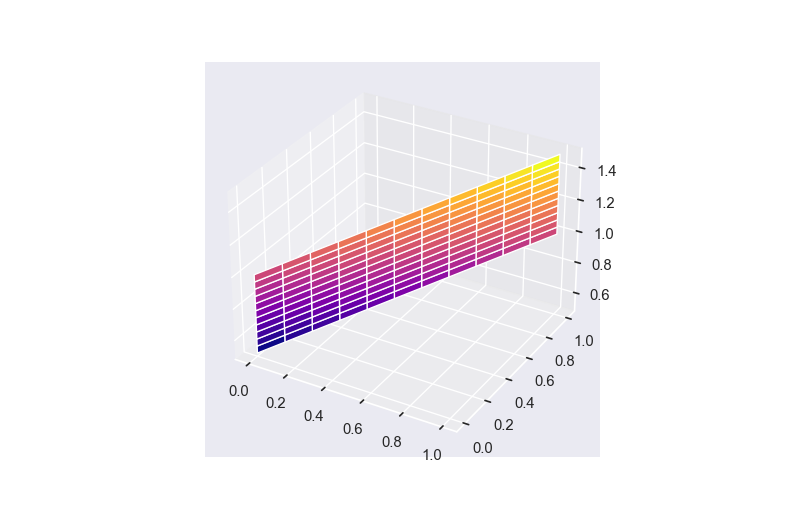

In [70]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

#ax.plot(x, y, u_an)
ax.plot_surface(x, y, u_an, cmap="plasma")

plt.show()

#### Построение численного решения

Определим разностную задачу на конечномерном пространстве: <br>
$$D_{h} = {(x_{l}, y_{m}, t^{n}) : x_{l} = h_{x}l, l =0,L, h_{x}L = 1; y_{m} = h_{y}m, m = 0,M, h_{y}M = 1; t^{n} = n\tau, n = 0,N, \tau N = C_{t}\mu/4(\mu + 2) - \Delta, \Delta - const} $$

$$\frac{\hat{u}_{l,m} - u_{l,m}^{n}}{\tau} = \frac{((u^{k}_{l+1,m})^{2} + (u_{l,m}^{k})^{2})[\hat{u}_{l+1,m} - \hat{u}_{l,m}]}{2h_{x}^{2}} - \frac{((u^{k}_{l,m})^{2} + (u_{l-1,m}^{k})^{2})[\hat{u}_{l,m} - \hat{u}_{l-1,m}]}{2h_{x}^{2}}, l = 1,L-1; m =1,M-1 $$<br>

$$\frac{{u}_{l,m}^{k+1} - \hat{u}_{l,m}}{\tau} = \frac{((u^{k}_{l,m+1})^{2} + (u_{l,m}^{k})^{2})[u_{l,m+1}^{k+1} - u_{l,m}^{k+1}]}{2h_{y}^{2}} - \frac{((u^{k}_{l,m})^{2} + (u_{l,m-1}^{k})^{2})[u_{l,m}^{k+1} - u_{l,m-1}^{k+1}]}{2h_{y}^{2}}, l = 1,L-1; m =1,M-1 $$<br>

$$k = n,J, J = [mink: max\left|\frac{u_{l,m}^{k+1} - u_{l,m}^{k}}{u_{l,m}^{k+1}}\right| \leq \varepsilon]$$ <br>
$$u_{l,m}^{n+1} = u_{l,m}^{J+1}$$ <br>
$$u_{l,m}^{0} = (1 + x_{l} + y_{m})/3 $$ <br>
$$u_{0,m}^{n+1} = (1 + y_{m})/\sqrt{9 - 8t^{n+1}}$$ <br>
$$u_{L,m}^{n+1} = (2 + y_{m})/\sqrt{9 - 8t^{n+1}}$$ <br>
$$u_{l,0}^{n+1} = (1 + x_{l})/\sqrt{9 - 8t^{n+1}}$$ <br>
$$u_{l,M}^{n+1} = (2 + x_{l})/\sqrt{9 - 8t^{n+1}} $$

Введем обозначения:
$$a_{l} = -[(u_{l+1,m}^{k})^{2} + (u_{l,m}^{k})^{2}]\tau/2h_{x}^{2}, c_{l} = -[(u_{l,m}^{k})^{2} + (u_{l-1,m}^{k})^{2}]\tau/2h_{x}^{2}, b_{l} = 1 - a_{l} - c_{l}, u_{0,m} = (1 + y_{m})/\sqrt{9 - 8t^{n+1}}, u_{L,m} = (2 + y_{m})/\sqrt{9 - 8t^{n+1}}, d_{l} = u_{l,m}^{n}, $$ <br>

$$\hat{u}_{0,m} = u_{0,m}$$ <br>
$$a_{l}\hat{u}_{l+1,m} + b_{l}\hat{u}_{l,m} + c_{l}\hat{u}_{l-1,m} = d_{l} $$<br>
$$\hat{u}_{L,m} = u_{L,m} $$

Последняя система решается методом прогонки

Далее по полученному решению производится второй полушаг. Новая система также решается методом прогонки. <br> 

$$\frac{u_{l,m}^{k+1} - \hat{u}_{l,m}}{\tau} = \frac{((u^{k}_{l,m+1})^{2} + (u_{l,m}^{k})^{2})[u_{l,m+1}^{k+1} - u_{l,m}^{k+1}]}{2h_{y}^{2}} - \frac{((u^{k}_{l,m})^{2} + (u_{l,m-1}^{k})^{2})[u_{l,m}^{k+1} - u_{l,m-1}^{k+1}]}{2h_{y}^{2}}, l = 1,L-1; m =1,M-1 $$<br>

$$k = n,J, J = [mink: max\left|\frac{u_{l,m}^{k+1} - u_{l,m}^{k}}{u_{l,m}^{k+1}}\right| \leq \varepsilon]$$ <br>
$$u_{l,0}^{k+1} = (1 + x_{l})/\sqrt{9 - 8t^{n+1}}$$ <br>
$$u_{l,M}^{k+1} = (2 + x_{l})/\sqrt{9 - 8t^{n+1}} $$ <br>

$$a_{m} = -[(u_{l,m+1}^{k})^{2} + (u_{l,m}^{k})^{2}]\tau/2h_{y}^{2}; c_{m} = -[(u_{l,m}^{k})^{2} + (u_{l,m-1}^{k})^{2}]\tau/2h_{y}^{2}; b_{m} = 1 - a_{m} - c_{m}; u_{l,0} = (1 + x_{l})/\sqrt{9 - 8t^{n+1}}; u_{l,M} = (2 + x_{l})/\sqrt{9 - 8t^{n+1}}; d_{m} = \hat{u}_{l,m} $$ <br>

$$u_{l,0}^{k+1} = u_{l,0}$$ <br>
$$a_{m}u_{l,m+1}^{k+1} + b_{m}u_{l,m}^{k+1} + c_{m}u_{l,m-1}^{k+1} = d_{m} $$<br>
$$u_{l,M}^{k+1} = u_{l,M} $$

$$Аппроксимация : О(h_{x}^{2} + h_{y}^{2} + \tau^{2} + h_{x}^{2}\tau^{2} + h_{y}^{2}\tau^{2}) $$<br>
$$Устойчивость: 

In [71]:
eps = 0.001

In [72]:
u_comp = np.zeros((N, L, M))

In [73]:
for l in range(L):
    for m in range(M):
        u_comp[0][l][m] = (1 + x[l] + y[m])/3

for n in range(N-1):
    for m in range(M):
        u_comp[n+1][0][m] = (1 + y[m])/np.sqrt(9 - 8 * (n + 1) * tau)
        u_comp[n+1][L-1][m] = (2 + y[m])/np.sqrt(9 - 8 * (n + 1) * tau)

for n in range(N-1):
    for l in range(L):
        u_comp[n+1][l][0] = (1 + x[l])/np.sqrt(9 - 8 * (n + 1) * tau)
        u_comp[n+1][l][M-1] = (2 + x[l])/np.sqrt(9 - 8 * (n + 1) * tau)                   

In [74]:
u_comp[N-1]

array([[0.48746668, 0.53178183, 0.57609698, 0.62041214, 0.66472729,
        0.70904244, 0.75335759, 0.79767275, 0.8419879 , 0.88630305,
        0.9306182 , 0.97493336],
       [0.53178183, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.01924851],
       [0.57609698, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.06356366],
       [0.62041214, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.10787881],
       [0.66472729, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.15219397],
       [0.70904244, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ,

In [75]:
for n in range(N-1):
    k = n
    J = k
    while(True): 
        #1
        u_hat = np.zeros((L, M))
        for m in range(1, M):
            for n in range(N-2):
                u_hat[0][m] = (1 + y[m])/np.sqrt(9 - 8 * (n+1) * tau)
                u_hat[L-1][m] = (2 + y[m])/np.sqrt(9 - 8 * (n+1) * tau)
        for m in range(1, M-1):
            a = np.zeros(L)
            b = np.zeros(L)
            c = np.zeros(L)
            d = np.zeros(L)
            alpha = np.zeros(L)
            beta = np.zeros(L)
            
            a[0] = 0
            b[0] = 1
            c[0] = 0
            d[0] = (1 + x[l])/np.sqrt(9 - 8 * (n+1) * tau)
            
            alpha[0] = -a[0]/b[0]
            beta[0] = d[0]/b[0]
            
            for l in range(1,L-1):
                a[l] = -((u_comp[k][l+1][m])**2 + (u_comp[k][l][m])**2) * tau/(2 * h_x**2)
                c[l] = -((u_comp[k][l][m])**2 + (u_comp[k][l-1][m])**2) * tau /(2 * h_x**2)
                b[l] = 1 - a[l] - c[l]
                d[l] = u_comp[n][l][m]
                
                alpha[l] = -a[l]/(b[l] + c[l] * alpha[l-1])
                beta[l] = (d[l] - c[l] * beta[l-1])/(b[l] + c[l] * alpha[l-1])
                
            a[L-1] = 0
            b[L-1] = 1
            c[L-1] = 0
            d[L-1] = (2 + x[l])/np.sqrt(9 - 8 * (n+1) * tau)
        
            u_hat[L-2][m] = (d[L-2] - c[L-2] * beta[L-3])/(b[L-2] + c[L-2] * alpha[L-3])
            
            for l in reversed(range(1, L)):
                u_hat[l-1][m] = alpha[l-1] * u_hat[l][m] + beta[l-1]
        #2
        for l in range(1, L-1):
            a = np.zeros(M)
            b = np.zeros(M)
            c = np.zeros(M)
            d = np.zeros(M)
            alpha = np.zeros(M)
            beta = np.zeros(M)
            
            a[0] = 0
            b[0] = 1
            c[0] = 0
            d[0] = (1 + y[m])/np.sqrt(9 - 8 * (n+1) * tau)
            
            alpha[0] = -a[0]/b[0]
            beta[0] = d[0]/b[0]
            
            for m in range(1, M-1):
                a[m] = -((u_comp[k][l][m+1])**2 + (u_comp[k][l][m])**2) * tau/(2 * h_x**2)
                c[m] = -((u_comp[k][l][m])**2 + (u_comp[k][l][m-1])**2) * tau /(2 * h_x**2)
                b[m] = 1 - a[m] - c[m]
                d[m] = u_hat[l][m]
                
                alpha[m] = -a[m]/(b[m] + c[m] * alpha[m-1])
                beta[m] = (d[m] - c[m] * beta[m-1])/(b[m] + c[m] * alpha[m-1])
                
            a[M-1] = 0
            b[M-1] = 1
            c[M-1] = 0
            d[M-1] = (2 + y[m])/np.sqrt(9 - 8 * (n+1) * tau)
        
            u_comp[k+1][l][M-2] = (d[M-2] - c[M-2] * beta[M-3])/(b[M-2] + c[M-2] * alpha[M-3])
        
            for m in reversed(range(2, M)):
                u_comp[k+1][l][m-1] = alpha[m-1] * u_comp[k+1][l][m] + beta[m-1]
                
        q = np.zeros((L, M))
        
        for l in range(1, L-1):
            for m in range(1, M-1):
                q[l][m] = abs((u_comp[k+1][l][m] - u_comp[k][l][m]) / u_comp[k][l][m])
                
        max_1_q = []
        for l in range(1, L-1):
            max_1_q.append(max(q[l]))
        max_2_q = max(max_1_q)

        if (max_2_q >= eps) and ((k + 1) != N - 1):
            k = k + 1
            J = k
        else:
            break

    for l in range(1, L-1):
        for m in range(1, M-1): 
            u_comp[n+1][l][m] = u_comp[J+1][l][m]

In [76]:
u_comp[N-1]   

array([[0.48746668, 0.53178183, 0.57609698, 0.62041214, 0.66472729,
        0.70904244, 0.75335759, 0.79767275, 0.8419879 , 0.88630305,
        0.9306182 , 0.97493336],
       [0.53178183, 0.80250864, 0.7150046 , 0.66797623, 0.6497261 ,
        0.64964711, 0.66204755, 0.68649056, 0.72701569, 0.79083381,
        0.88559214, 1.01924851],
       [0.57609698, 0.65032545, 0.66736928, 0.68763022, 0.71090483,
        0.73703421, 0.76660561, 0.80124105, 0.84372517, 0.89800482,
        0.96887351, 1.06356366],
       [0.62041214, 0.64714426, 0.6929138 , 0.7332662 , 0.7708764 ,
        0.80735174, 0.84412138, 0.88281799, 0.92548455, 0.97471026,
        1.03367564, 1.10787881],
       [0.66472729, 0.65290521, 0.71946762, 0.77391177, 0.82136685,
        0.86477398, 0.90621412, 0.94747404, 0.99035121, 1.03685697,
        1.08935795, 1.15219397],
       [0.70904244, 0.66305912, 0.74636194, 0.81149946, 0.86620124,
        0.91462768, 0.95944033, 1.00262962, 1.04593469, 1.0911038 ,
        1.1400786 ,

In [77]:
diff = np.zeros((L, M))
for l in range(L):
    for m in range(M):
        diff[l][m] = abs(u_an[l][m] - u_comp[N-1][l][m])       

In [78]:
maxdiff = []
for l in range(L):
    maxdiff.append(max(diff[l]))
print(max(maxdiff))

0.2373601478745917


<IPython.core.display.Javascript object>


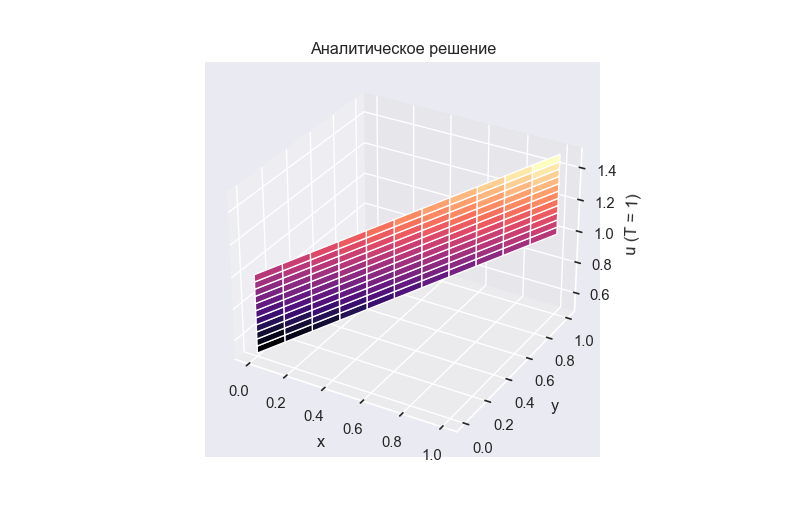

In [79]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, u_an, cmap="magma")

ax.set_title("Аналитическое решение")
ax.set_xlabel("x")

ax.set_ylabel("y")

ax.set_zlabel("u (T = 1)")

plt.show()

<IPython.core.display.Javascript object>


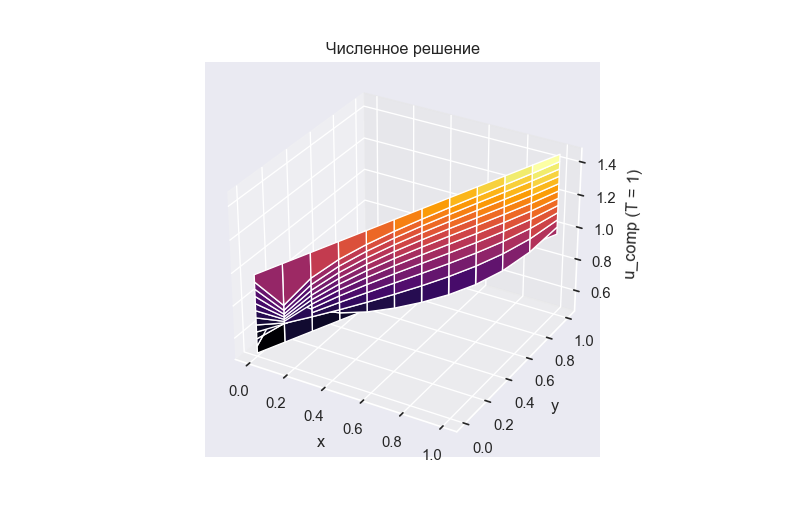

In [80]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, u_comp[N-1], cmap="inferno")

ax.set_title("Численное решение")
ax.set_xlabel("x")

ax.set_ylabel("y")

ax.set_zlabel("u_comp (T = 1)")

plt.show()

<IPython.core.display.Javascript object>


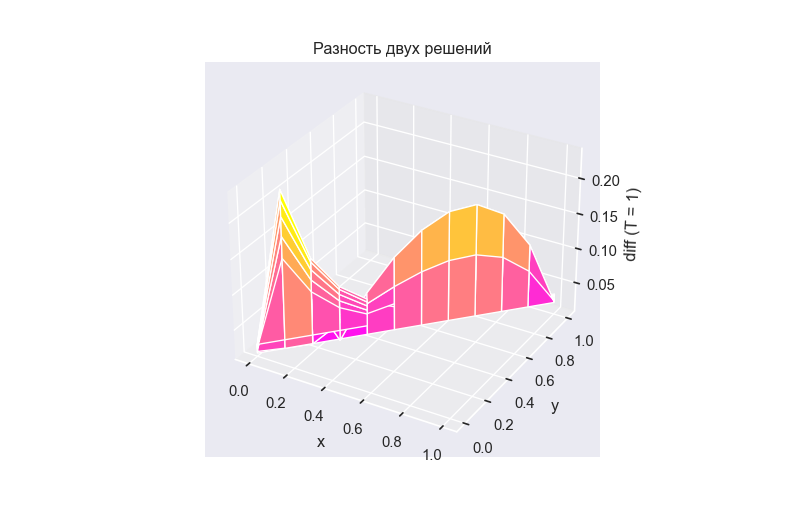

In [81]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, diff, cmap="spring")

ax.set_title("Разность двух решений")
ax.set_xlabel("x")

ax.set_ylabel("y")

ax.set_zlabel("diff (T = 1)")
plt.show()